<a href="https://colab.research.google.com/github/PEPE0211/PortfolioProjects/blob/main/Python/Automated_API_Extraction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


In [39]:
type(data)

dict

In [40]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [41]:
#normalizing the data

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

<ipython-input-41-2015d057ab98>:4: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10553,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19546050.00000,19546050.00000,False,NaN,1,NaN,NaN,None,2023-11-18T20:58:00.000Z,36618.21918,12586785878.95253,-47.73660,-0.25233,0.27359,-1.03870,27.43221,34.68758,39.61998,715741542961.42590,51.41740,768982602735.07996,None,2023-11-18T20:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-18 20:58:42.722437
1,1027,Ethereum,ETH,ethereum,7800,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120252716.63066,120252716.63066,True,NaN,2,NaN,NaN,None,2023-11-18T20:58:00.000Z,1964.89658,8567816473.32130,-31.69030,-0.02247,1.04392,-4.54743,25.47979,19.62952,16.32683,236284152052.68262,16.97360,236284152052.67999,None,2023-11-18T20:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-18 20:58:42.722437
2,825,Tether USDt,USDT,tether,65969,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,87678283982.64670,90623279059.65834,True,NaN,3,NaN,NaN,None,2023-11-18T20:57:00.000Z,1.00063,31903207880.07093,-32.25010,0.00583,0.02511,0.04784,0.02052,0.03706,0.06208,87733641749.92133,6.30260,90680496219.53000,None,2023-11-18T20:57:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-18 20:58:42.722437
3,1839,BNB,BNB,bnb,1768,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,151700695.51849,151700695.51849,False,NaN,4,NaN,NaN,None,2023-11-18T20:57:00.000Z,244.68469,690146737.82296,-15.06220,-0.16369,0.44032,-3.21550,16.19557,12.76437,12.43688,37118837075.49600,2.66660,37118837075.50000,None,2023-11-18T20:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-18 20:58:42.722437
4,52,XRP,XRP,xrp,1144,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53718306475.00000,99988221902.00000,False,NaN,5,NaN,NaN,None,2023-11-18T20:58:00.000Z,0.61284,873959333.88612,-43.59600,-0.19272,0.63993,-8.28058,22.57627,19.43377,12.92772,32920811012.58967,2.36490,61284156506.15000,None,2023-11-18T20:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-18 20:58:42.722437
5,5426,Solana,SOL,solana,547,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,422870107.95288,562811258.93600,True,NaN,6,NaN,NaN,None,2023-11-18T20:58:00.000Z,59.02358,2039555003.43905,-42.69140,-0.41413,1.61775,2.66462,134.88590,196.04858,169.46536,24959306392.97429,1.79300,33219133698.53000,None,2023-11-18T20:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-18 20:58:42.722437
6,3408,USDC,USDC,usd-coin,14999,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,24413843742.11847,24413843742.11847,False,NaN,7,NaN,NaN,None,2023-11-18T20:58:00.000Z,1.00011,3698848253.36295,-36.56540,0.00169,-0.01415,0.02972,0.00457,-0.00596,0.00647,24416537111.94933,1.75400,24416537111.95000,None,2023-11-18T20:58:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-11-18 20:58:42.722437
7,2010,Cardano,ADA,cardano,975,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35278488304.29200,36365391092.90400,False,NaN,8,NaN,NaN,None,2023-11-18T20:57:00.000Z,0.37418,339254663.56680,-24.23080,0.38697,2.71227,-2.90881,52.09676,46.51944,37.81106,13200411135.62561,0.94830,16837980584.07000,None,2023-11-18T20:57:00.000Z,

In [42]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = df.append(df2)



In [43]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

<ipython-input-42-ff4f6816c05d>:25: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['timestamp'] = pd.to_datetime('now')
<ipython-input-42-ff4f6816c05d>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


<ipython-input-42-ff4f6816c05d>:25: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['timestamp'] = pd.to_datetime('now')
<ipython-input-42-ff4f6816c05d>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


<ipython-input-42-ff4f6816c05d>:25: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['timestamp'] = pd.to_datetime('now')
<ipython-input-42-ff4f6816c05d>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


<ipython-input-42-ff4f6816c05d>:25: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['timestamp'] = pd.to_datetime('now')
<ipython-input-42-ff4f6816c05d>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


<ipython-input-42-ff4f6816c05d>:25: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['timestamp'] = pd.to_datetime('now')
<ipython-input-42-ff4f6816c05d>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


<ipython-input-42-ff4f6816c05d>:25: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['timestamp'] = pd.to_datetime('now')
<ipython-input-42-ff4f6816c05d>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


KeyboardInterrupt: ignored

In [44]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10553,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19546050.00000,19546050.00000,False,NaN,1,NaN,NaN,None,2023-11-18T20:58:00.000Z,36618.21918,12586785878.95253,-47.73660,-0.25233,0.27359,-1.03870,27.43221,34.68758,39.61998,715741542961.42590,51.41740,768982602735.07996,None,2023-11-18T20:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-18 20:58:42.722437
1,1027,Ethereum,ETH,ethereum,7800,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120252716.63066,120252716.63066,True,NaN,2,NaN,NaN,None,2023-11-18T20:58:00.000Z,1964.89658,8567816473.32130,-31.69030,-0.02247,1.04392,-4.54743,25.47979,19.62952,16.32683,236284152052.68262,16.97360,236284152052.67999,None,2023-11-18T20:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-18 20:58:42.722437
2,825,Tether USDt,USDT,tether,65969,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,87678283982.64670,90623279059.65834,True,NaN,3,NaN,NaN,None,2023-11-18T20:57:00.000Z,1.00063,31903207880.07093,-32.25010,0.00583,0.02511,0.04784,0.02052,0.03706,0.06208,87733641749.92133,6.30260,90680496219.53000,None,2023-11-18T20:57:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-18 20:58:42.722437
3,1839,BNB,BNB,bnb,1768,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,151700695.51849,151700695.51849,False,NaN,4,NaN,NaN,None,2023-11-18T20:57:00.000Z,244.68469,690146737.82296,-15.06220,-0.16369,0.44032,-3.21550,16.19557,12.76437,12.43688,37118837075.49600,2.66660,37118837075.50000,None,2023-11-18T20:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-18 20:58:42.722437
4,52,XRP,XRP,xrp,1144,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53718306475.00000,99988221902.00000,False,NaN,5,NaN,NaN,None,2023-11-18T20:58:00.000Z,0.61284,873959333.88612,-43.59600,-0.19272,0.63993,-8.28058,22.57627,19.43377,12.92772,32920811012.58967,2.36490,61284156506.15000,None,2023-11-18T20:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-18 20:58:42.722437
5,5426,Solana,SOL,solana,547,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,422870107.95288,562811258.93600,True,NaN,6,NaN,NaN,None,2023-11-18T20:58:00.000Z,59.02358,2039555003.43905,-42.69140,-0.41413,1.61775,2.66462,134.88590,196.04858,169.46536,24959306392.97429,1.79300,33219133698.53000,None,2023-11-18T20:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-18 20:58:42.722437
6,3408,USDC,USDC,usd-coin,14999,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,24413843742.11847,24413843742.11847,False,NaN,7,NaN,NaN,None,2023-11-18T20:58:00.000Z,1.00011,3698848253.36295,-36.56540,0.00169,-0.01415,0.02972,0.00457,-0.00596,0.00647,24416537111.94933,1.75400,24416537111.95000,None,2023-11-18T20:58:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-11-18 20:58:42.722437
7,2010,Cardano,ADA,cardano,975,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35278488304.29200,36365391092.90400,False,NaN,8,NaN,NaN,None,2023-11-18T20:57:00.000Z,0.37418,339254663.56680,-24.23080,0.38697,2.71227,-2.90881,52.09676,46.51944,37.81106,13200411135.62561,0.94830,16837980584.07000,None,2023-11-18T20:57:00.000Z,

In [45]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [46]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10553,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19546050.00000,19546050.00000,False,NaN,1,NaN,NaN,None,2023-11-18T20:58:00.000Z,36618.21918,12586785878.95253,-47.73660,-0.25233,0.27359,-1.03870,27.43221,34.68758,39.61998,715741542961.42590,51.41740,768982602735.07996,None,2023-11-18T20:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-18 20:58:42.722437
1,1027,Ethereum,ETH,ethereum,7800,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120252716.63066,120252716.63066,True,NaN,2,NaN,NaN,None,2023-11-18T20:58:00.000Z,1964.89658,8567816473.32130,-31.69030,-0.02247,1.04392,-4.54743,25.47979,19.62952,16.32683,236284152052.68262,16.97360,236284152052.67999,None,2023-11-18T20:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-18 20:58:42.722437
2,825,Tether USDt,USDT,tether,65969,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,87678283982.64670,90623279059.65834,True,NaN,3,NaN,NaN,None,2023-11-18T20:57:00.000Z,1.00063,31903207880.07093,-32.25010,0.00583,0.02511,0.04784,0.02052,0.03706,0.06208,87733641749.92133,6.30260,90680496219.53000,None,2023-11-18T20:57:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-18 20:58:42.722437
3,1839,BNB,BNB,bnb,1768,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,151700695.51849,151700695.51849,False,NaN,4,NaN,NaN,None,2023-11-18T20:57:00.000Z,244.68469,690146737.82296,-15.06220,-0.16369,0.44032,-3.21550,16.19557,12.76437,12.43688,37118837075.49600,2.66660,37118837075.50000,None,2023-11-18T20:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-18 20:58:42.722437
4,52,XRP,XRP,xrp,1144,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53718306475.00000,99988221902.00000,False,NaN,5,NaN,NaN,None,2023-11-18T20:58:00.000Z,0.61284,873959333.88612,-43.59600,-0.19272,0.63993,-8.28058,22.57627,19.43377,12.92772,32920811012.58967,2.36490,61284156506.15000,None,2023-11-18T20:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-18 20:58:42.722437
5,5426,Solana,SOL,solana,547,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,422870107.95288,562811258.93600,True,NaN,6,NaN,NaN,None,2023-11-18T20:58:00.000Z,59.02358,2039555003.43905,-42.69140,-0.41413,1.61775,2.66462,134.88590,196.04858,169.46536,24959306392.97429,1.79300,33219133698.53000,None,2023-11-18T20:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-18 20:58:42.722437
6,3408,USDC,USDC,usd-coin,14999,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,24413843742.11847,24413843742.11847,False,NaN,7,NaN,NaN,None,2023-11-18T20:58:00.000Z,1.00011,3698848253.36295,-36.56540,0.00169,-0.01415,0.02972,0.00457,-0.00596,0.00647,24416537111.94933,1.75400,24416537111.95000,None,2023-11-18T20:58:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-11-18 20:58:42.722437
7,2010,Cardano,ADA,cardano,975,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35278488304.29200,36365391092.90400,False,NaN,8,NaN,NaN,None,2023-11-18T20:57:00.000Z,0.37418,339254663.56680,-24.23080,0.38697,2.71227,-2.90881,52.09676,46.51944,37.81106,13200411135.62561,0.94830,16837980584.07000,None,2023-11-18T20:57:00.000Z,

In [47]:
#Looking At cointrends
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.25132,0.30519,-1.04094,27.49256,34.68456,39.61186
Ethereum,-0.03616,1.06311,-4.53447,25.43316,19.63986,16.33119
Tether USDt,0.00703,0.02777,0.05474,0.02433,0.03720,0.07127
BNB,-0.17180,0.46089,-3.17410,16.25120,12.75831,12.41457
XRP,-0.19542,0.62820,-8.30383,22.26818,19.40699,12.92258
Solana,-0.34438,1.63286,2.50567,134.97538,195.99691,169.32761
USDC,-0.00036,-0.00215,0.02345,0.00159,-0.00996,0.00408
Cardano,0.19935,2.75955,-2.92617,52.14855,46.44486,37.71520
Dogecoin,-0.64381,-2.56779,1.08284,37.98148,29.46354,26.39010


In [48]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.25132
             quote.USD.percent_change_24h     0.30519
             quote.USD.percent_change_7d     -1.04094
             quote.USD.percent_change_30d    27.49256
             quote.USD.percent_change_60d    34.68456
             quote.USD.percent_change_90d    39.61186
Ethereum     quote.USD.percent_change_1h     -0.03616
             quote.USD.percent_change_24h     1.06311
             quote.USD.percent_change_7d     -4.53447
             quote.USD.percent_change_30d    25.43316
             quote.USD.percent_change_60d    19.63986
             quote.USD.percent_change_90d    16.33119
Tether USDt  quote.USD.percent_change_1h      0.00703
             quote.USD.percent_change_24h     0.02777
             quote.USD.percent_change_7d      0.05474
             quote.USD.percent_change_30d     0.02433
             quote.USD.percent_change_60d     0.03720
             quote.USD.percent_change_90

In [49]:
type(df4)

pandas.core.series.Series

In [50]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.25132
            quote.USD.percent_change_24h   0.30519
            quote.USD.percent_change_7d   -1.04094
            quote.USD.percent_change_30d  27.49256
            quote.USD.percent_change_60d  34.68456
            quote.USD.percent_change_90d  39.61186
Ethereum    quote.USD.percent_change_1h   -0.03616
            quote.USD.percent_change_24h   1.06311
            quote.USD.percent_change_7d   -4.53447
            quote.USD.percent_change_30d  25.43316
            quote.USD.percent_change_60d  19.63986
            quote.USD.percent_change_90d  16.33119
Tether USDt quote.USD.percent_change_1h    0.00703
            quote.USD.percent_change_24h   0.02777
            quote.USD.percent_change_7d    0.05474
            quote.USD.percent_change_30d   0.02433
            quote.USD.percent_change_60d   0.03720
            quote.USD.percent_change_90d   0.07127
BNB         quote.USD.percent_change_1h   -0.17180
            quote.USD.percent_change_24h   0.46089
            quote.USD.percent_change_7d   -3.17410
            quote.USD.percent_change_30d  16.25120
            quote.USD.percent_change_60d  12.75831
            quote.USD.percent_change_90d  12.41457
XRP         quote.USD.percent_change_1h   -0.19542
            quote.USD.percent_change_24h   0.62820
            quote.USD.percent_change_7d   -8.30383
            quote.USD.percent_change_30d  22.26818
            quote.USD.percent_change_60d  19.40699
            quote.USD.percent_change_90d  12.92258
Solana      quote.USD.percent_change_1h   -0.34438
            quote.USD.percent_change_24h   1.63286
            quote.USD.percent_change_7d    2.50567
            quote.USD.percent_change_30d 134.97538
            quote.USD.percent_change_60d 195.99691
            quote.USD.percent_change_90d 169.32761
USDC        quote.USD.percent_change_1h   -0.00036
            quote.USD.percent_change_24h  -0.00215
            quote.USD.percent_change_7d    0.02345
            quote.USD.percent_change_30d   0.00159
            quote.USD.percent_change_60d  -0.00996
            quote.USD.percent_change_90d   0.00408
Cardano     quote.USD.percent_change_1h    0.19935
            quote.USD.percent_change_24h   2.75955
            quote.USD.percent_change_7d   -2.92617
            quote.USD.percent_change_30d  52.14855
            quote.USD.percent_change_60d  46.44486
            quote.USD.percent_change_90d  37.71520
Dogecoin    quote.USD.percent_change_1h   -0.64381
            quote.USD.percent_change_24h  -2.56779
            quote.USD.percent_change_7d    1.08284
            quote.USD.percent_change_30d  37.98148
            quote.USD.percent_change_60d  29.46354
            quote.USD.percent_change_90d  26.39010
TRON        quote.USD.percent_change_1h   -0.06987
            quote.USD.percent_change_24h  -0.18967
            quote.USD.percent_change_7d   -4.95927
            quote.USD.percent_change_30d  14.85524
            quote.USD.percent_change_60d  21.88428
            quote.USD.percent_change_90d  35.33004
Toncoin     quote.USD.percent_change_1h   -0.79561
            quote.USD.percent_change_24h   3.03741
            quote.USD.percent_change_7d   -3.45594
            quote.USD.percent_change_30d  13.00469
            quote.USD.percent_change_60d  -7.58523
            quote.USD.percent_change_90d  71.51979
Avalanche   quote.USD.percent_change_1h   -0.71947
            quote.USD.percent_change_24h   3.45674
            quote.USD.percent_change_7d   34.78216
            quote.USD.percent_change_30d 144.88973
            quote.USD.percent_change_60d 141.80925
            quote.USD.percent_change_90d 103.39318
Polygon     quote.USD.percent_change_1h   -0.07497
            quote.USD.percent_change_24h   1.17512
            quote.USD.percent_change_7d    2.56075
            quote.USD.percent_change_30d  59.95252
            quote.USD.percent_change_60d  52.50675
            quo

In [51]:
df5.count()

values    90
dtype: int64

In [52]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.25132
1,Bitcoin,quote.USD.percent_change_24h,0.30519
2,Bitcoin,quote.USD.percent_change_7d,-1.04094
3,Bitcoin,quote.USD.percent_change_30d,27.49256
4,Bitcoin,quote.USD.percent_change_60d,34.68456
5,Bitcoin,quote.USD.percent_change_90d,39.61186
6,Ethereum,quote.USD.percent_change_1h,-0.03616
7,Ethereum,quote.USD.percent_change_24h,1.06311
8,Ethereum,quote.USD.percent_change_7d,-4.53447
9,Ethereum,quote.USD.percent_change_30d,25.43316


In [53]:
# Changing the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.25132
1,Bitcoin,quote.USD.percent_change_24h,0.30519
2,Bitcoin,quote.USD.percent_change_7d,-1.04094
3,Bitcoin,quote.USD.percent_change_30d,27.49256
4,Bitcoin,quote.USD.percent_change_60d,34.68456
5,Bitcoin,quote.USD.percent_change_90d,39.61186
6,Ethereum,quote.USD.percent_change_1h,-0.03616
7,Ethereum,quote.USD.percent_change_24h,1.06311
8,Ethereum,quote.USD.percent_change_7d,-4.53447
9,Ethereum,quote.USD.percent_change_30d,25.43316


In [54]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h',	'quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.25132
1,Bitcoin,24h,0.30519
2,Bitcoin,7d,-1.04094
3,Bitcoin,30d,27.49256
4,Bitcoin,60d,34.68456
5,Bitcoin,90d,39.61186
6,Ethereum,1h,-0.03616
7,Ethereum,24h,1.06311
8,Ethereum,7d,-4.53447
9,Ethereum,30d,25.43316


In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

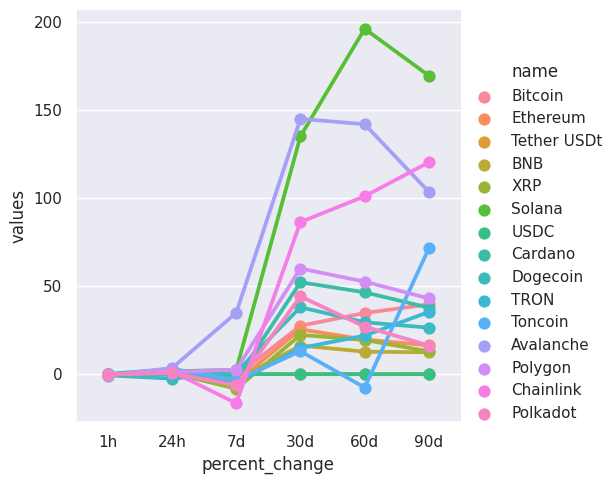

In [56]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [57]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10553,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19546050.00000,19546050.00000,False,NaN,1,NaN,NaN,None,2023-11-18T20:58:00.000Z,36618.21918,12586785878.95253,-47.73660,-0.25233,0.27359,-1.03870,27.43221,34.68758,39.61998,715741542961.42590,51.41740,768982602735.07996,None,2023-11-18T20:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-18 20:58:42.722437
1,1027,Ethereum,ETH,ethereum,7800,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120252716.63066,120252716.63066,True,NaN,2,NaN,NaN,None,2023-11-18T20:58:00.000Z,1964.89658,8567816473.32130,-31.69030,-0.02247,1.04392,-4.54743,25.47979,19.62952,16.32683,236284152052.68262,16.97360,236284152052.67999,None,2023-11-18T20:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-18 20:58:42.722437
2,825,Tether USDt,USDT,tether,65969,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,87678283982.64670,90623279059.65834,True,NaN,3,NaN,NaN,None,2023-11-18T20:57:00.000Z,1.00063,31903207880.07093,-32.25010,0.00583,0.02511,0.04784,0.02052,0.03706,0.06208,87733641749.92133,6.30260,90680496219.53000,None,2023-11-18T20:57:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-18 20:58:42.722437
3,1839,BNB,BNB,bnb,1768,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,151700695.51849,151700695.51849,False,NaN,4,NaN,NaN,None,2023-11-18T20:57:00.000Z,244.68469,690146737.82296,-15.06220,-0.16369,0.44032,-3.21550,16.19557,12.76437,12.43688,37118837075.49600,2.66660,37118837075.50000,None,2023-11-18T20:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-18 20:58:42.722437
4,52,XRP,XRP,xrp,1144,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53718306475.00000,99988221902.00000,False,NaN,5,NaN,NaN,None,2023-11-18T20:58:00.000Z,0.61284,873959333.88612,-43.59600,-0.19272,0.63993,-8.28058,22.57627,19.43377,12.92772,32920811012.58967,2.36490,61284156506.15000,None,2023-11-18T20:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-18 20:58:42.722437
5,5426,Solana,SOL,solana,547,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,422870107.95288,562811258.93600,True,NaN,6,NaN,NaN,None,2023-11-18T20:58:00.000Z,59.02358,2039555003.43905,-42.69140,-0.41413,1.61775,2.66462,134.88590,196.04858,169.46536,24959306392.97429,1.79300,33219133698.53000,None,2023-11-18T20:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-18 20:58:42.722437
6,3408,USDC,USDC,usd-coin,14999,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,24413843742.11847,24413843742.11847,False,NaN,7,NaN,NaN,None,2023-11-18T20:58:00.000Z,1.00011,3698848253.36295,-36.56540,0.00169,-0.01415,0.02972,0.00457,-0.00596,0.00647,24416537111.94933,1.75400,24416537111.95000,None,2023-11-18T20:58:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-11-18 20:58:42.722437
7,2010,Cardano,ADA,cardano,975,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35278488304.29200,36365391092.90400,False,NaN,8,NaN,NaN,None,2023-11-18T20:57:00.000Z,0.37418,339254663.56680,-24.23080,0.38697,2.71227,-2.90881,52.09676,46.51944,37.81106,13200411135.62561,0.94830,16837980584.07000,None,2023-11-18T20:57:00.000Z,

In [60]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,36618.21918,2023-11-18 20:58:42.722437
0,Bitcoin,36618.21918,2023-11-18 20:58:43.018829
0,Bitcoin,36623.23739,2023-11-18 20:59:43.331738
0,Bitcoin,36620.68938,2023-11-18 21:00:43.814932
0,Bitcoin,36617.01355,2023-11-18 21:01:44.126670
0,Bitcoin,36601.75067,2023-11-18 21:02:44.495670
0,Bitcoin,36612.86820,2023-11-18 21:03:44.800302


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

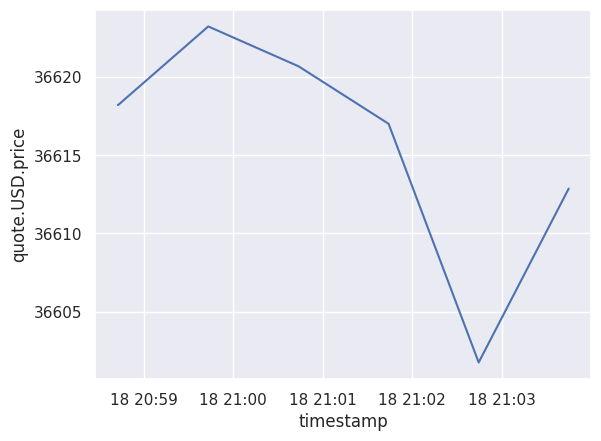

In [61]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)

<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

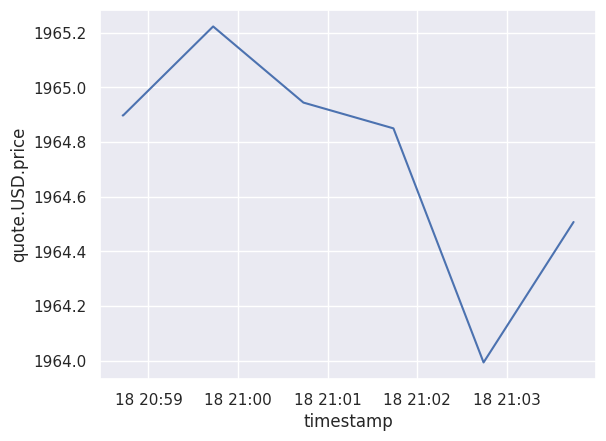

In [62]:
df11 = df[['name','quote.USD.price','timestamp']]
df11 = df11.query("name == 'Ethereum'")

sns.set_theme(style="darkgrid")
sns.lineplot(x='timestamp', y='quote.USD.price', data = df11)